##Lower Back Pain Symptoms Dataset##

https://www.kaggle.com/sammy123/lower-back-pain-symptoms-dataset

Collection of physical spine data (Random Forest Algorithm applied
to classify if a person has or not lower back pain - from Kaggle)




In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [146]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Dataset_spine.csv")
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [149]:
df.shape

(310, 14)

Abnormal    210
Normal      100
Name: Class_att, dtype: int64

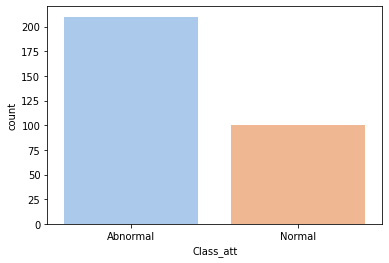

In [148]:
sns.countplot(x="Class_att", data=df, palette="pastel")
df["Class_att"].value_counts()

In [150]:
df2 = df.copy()

In [151]:
# Let's get rid of this useless column
df2 = df2.drop("Unnamed: 13", axis=1)

In [152]:
df2.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [153]:
# Great! No null values
df2.isnull().sum()

Col1         0
Col2         0
Col3         0
Col4         0
Col5         0
Col6         0
Col7         0
Col8         0
Col9         0
Col10        0
Col11        0
Col12        0
Class_att    0
dtype: int64

In [154]:
X = df2.drop("Class_att", axis=1)

In [155]:
# The label is categorical which means it's necessary to turn it into numerical
df2 = pd.get_dummies(df2, "Class_att", drop_first=True)
y = df2["Class_att_Normal"]

In [156]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [157]:
# Random Forest Classifier
rfc = RandomForestClassifier(random_state=1234)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

In [158]:
y_predict = rfc.predict(X_test)

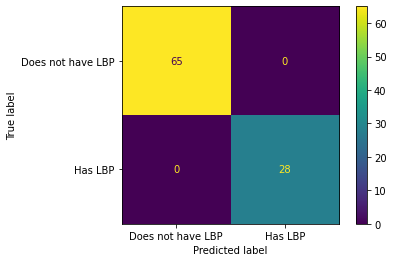

In [159]:
# Confusion Matrix and Score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
cm = confusion_matrix(y_test, y_predict)
plot_confusion_matrix(rfc, X_test, y_predict, display_labels=["Does not have LBP", "Has LBP"], 
                      values_format="g");

In [160]:
model_score = rfc.score(X_test, y_test)
model_score

0.8064516129032258

In [161]:
#  Let's use GridSearchCV here

In [162]:
from sklearn.model_selection import GridSearchCV

In [163]:
rfc_param = {'n_estimators':[10, 15, 20],
             'min_samples_split': [8, 16],
             'min_samples_leaf':[1, 2, 3, 4, 5]
             }

In [164]:
rfc_grid = GridSearchCV(estimator=rfc,
                        param_grid=rfc_param,
                        scoring="accuracy",
                        cv=10,
                        return_train_score=True) 

In [165]:
# Fit the data
rfc_grid_fit = rfc_grid.fit(X, y)

In [166]:
cv_results_rfc = pd.DataFrame.from_dict(rfc_grid_fit.cv_results_)
cv_results_rfc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.019488,0.003105,0.002457,0.000052,1,8,10,"{'min_samples_leaf': 1, 'min_samples_split': 8...",0.548387,0.612903,0.580645,0.838710,0.903226,0.903226,0.903226,0.903226,0.838710,0.838710,0.787097,0.138522,26,0.982079,0.967742,0.974910,0.971326,0.964158,0.971326,0.978495,0.964158,0.989247,0.982079,0.974552,0.007926
1,0.027133,0.001956,0.003050,0.000489,1,8,15,"{'min_samples_leaf': 1, 'min_samples_split': 8...",0.677419,0.612903,0.645161,0.870968,0.935484,0.903226,0.903226,0.967742,0.838710,0.838710,0.819355,0.120871,2,0.982079,0.982079,0.982079,0.989247,0.982079,0.982079,0.989247,0.982079,0.982079,0.978495,0.983154,0.003226
2,0.032468,0.000539,0.003240,0.000372,1,8,20,"{'min_samples_leaf': 1, 'min_samples_split': 8...",0.645161,0.612903,0.677419,0.806452,0.935484,0.870968,0.935484,0.935484,0.903226,0.838710,0.816129,0.119877,4,0.978495,0.982079,0.982079,0.989247,0.989247,0.978495,0.982079,0.985663,0.989247,0.985663,0.984229,0.003991
3,0.017543,0.000398,0.002355,0.000048,1,16,10,"{'min_samples_leaf': 1, 'min_samples_split': 1...",0.451613,0.612903,0.645161,0.806452,0.903226,0.903226,0.935484,0.903226,0.806452,0.806452,0.777419,0.150234,29,0.953405,0.949821,0.935484,0.953405,0.924731,0.942652,0.931900,0.946237,0.939068,0.931900,0.940860,0.009381
4,0.026051,0.001850,0.002815,0.000083,1,16,15,"{'min_samples_leaf': 1, 'min_samples_split': 1...",0.612903,0.612903,0.645161,0.870968,0.903226,0.870968,0.935484,0.935484,0.806452,0.806452,0.800000,0.123089,14,0.960573,0.939068,0.939068,0.960573,0.928315,0.935484,0.960573,0.971326,0.956989,0.953405,0.950538,0.013296
5,0.032698,0.000741,0.003106,0.000046,1,16,20,"{'min_samples_leaf': 1, 'min_samples_split': 1...",0.580645,0.612903,0.612903,0.806452,0.903226,0.870968,0.935484,0.935484,0.838710,0.806452,0.790323,0.130834,23,0.964158,0.935484,0.942652,0.960573,0.949821,0.942652,0.960573,0.971326,0.953405,0.939068,0.951971,0.011357
6,0.017627,0.000317,0.002342,0.000029,2,8,10,"{'min_samples_leaf': 2, 'min_samples_split': 8...",0.516129,0.580645,0.645161,0.838710,0.903226,0.903226,0.935484,0.903226,0.838710,0.838710,0.790323,0.143720,23,0.978495,0.967742,0.953405,0.964158,0.964158,0.967742,0.964158,0.960573,0.978495,0.964158,0.966308,0.007204
7,0.026050,0.003029,0.002957,0.000523,2,8,15,"{'min_samples_leaf': 2, 'min_samples_split': 8...",0.645161,0.580645,0.645161,0.870968,0.935484,0.903226,0.935484,0.935484,0.838710,0.838710,0.812903,0.129676,6,0.971326,0.967742,0.971326,0.978495,0.978495,0.974910,0.982079,0.974910,0.985663,0.978495,0.976344,0.005119
8,0.032810,0.000705,0.003170,0.000110,2,8,20,"{'min_samples_leaf': 2, 'min_samples_split': 8...",0.677419,0.612903,0.645161,0.806452,0.935484,0.903226,0.935484,0.935484,0.870968,0.838710,0.816129,0.119877,5,0.974910,0.974910,0.978495,0.974910,0.971326,0.974910,0.978495,0.978495,0.982079,0.974910,0.976344,0.002867
9,0.017886,0.000439,0.002464,0.000246,2,16,10,"{'min_samples_leaf': 2, 'min_samples_split': 1...",0.612903,0.580645,0.645161,0.838710,0.870968,0.935484,0.935484,0.935484,0.806452,0.806452,0.796774,0.129876,20,0.953405,0.946237,0.928315,0.971326,0.921147,0.931900,0.917563,0.939068,0.939068,0.935484,0.938351,0.015020


In [167]:
first = cv_results_rfc[cv_results_rfc["rank_test_score"] == 1]
first

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
13,0.025742,0.00108,0.002773,0.000066,3,8,15,"{'min_samples_leaf': 3, 'min_samples_split': 8...",0.677419,0.612903,0.612903,0.806452,0.935484,0.935484,0.935484,0.967742,0.903226,0.83871,0.822581,0.132415,1,0.971326,0.964158,0.960573,0.978495,0.97491,0.960573,0.982079,0.967742,0.978495,0.971326,0.970968,0.007249


In [168]:
print(rfc_grid_fit.best_params_)

{'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 15}


In [169]:
# Random Forest Classifier applying GridSeachCV results
rfc_2 = RandomForestClassifier(n_estimators=15,
                             min_samples_leaf=3,
                             min_samples_split=8,
                             random_state=1234)
rfc_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

In [170]:
y_predict_2 = rfc_2.predict(X_test)

In [171]:
model_score_2 = rfc_2.score(X_test, y_test)
model_score_2

0.8279569892473119

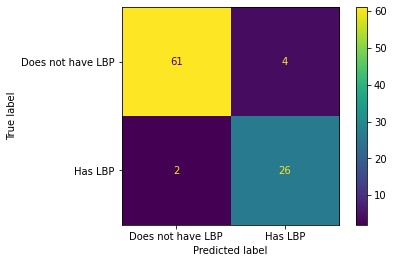

In [172]:
cm = confusion_matrix(y_test, y_predict)
plot_confusion_matrix(rfc_2, X_test, y_predict, display_labels=["Does not have LBP", "Has LBP"], 
                      values_format="g");

In [173]:
# Now let's apply Randomized Search
from sklearn.model_selection import RandomizedSearchCV
rfc_param = {'n_estimators':[10, 15, 20],
             'min_samples_split': [8, 16],
             'min_samples_leaf':[1, 2, 3, 4, 5]
             }

In [174]:
rfc_rs = RandomizedSearchCV(estimator=rfc,
                            param_distributions=rfc_param,
                            scoring="accuracy",
                            cv=10,
                            n_iter=10,
                            return_train_score=True,
                            random_state=1234)

In [175]:
rfc_rs_fit = rfc_rs.fit(X, y)

In [176]:
cv_results_rfc_rs = pd.DataFrame.from_dict(rfc_rs_fit.cv_results_)

In [177]:
print(f"The best parameters are: {rfc_rs_fit.best_params_}")

The best parameters are: {'n_estimators': 15, 'min_samples_split': 8, 'min_samples_leaf': 3}
